In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
## Only for use in Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# read in data
data_path = "data\\train.csv\\train.csv"
data = pd.read_csv(data_path)

print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [16]:
labels = data['Target']
data = data.drop(['Target'], axis=1)
data = data.drop(['id'], axis=1)

# Preprocessing

In [17]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# # normalize
# norm_features = ['']
# data = (data - data.min()) / (data.max() - data.min())


In [18]:
## PCA
corr_matrix = abs(data.corr())

threshold = 0.7
high_corr = corr_matrix[corr_matrix >= threshold].fillna(0)

heat_map = px.imshow(high_corr,
                     labels=dict(color="Correlation"),
                     x=corr_matrix.columns,
                     y=corr_matrix.columns, 
                     width = 1000,
                     height = 1000)

heat_map.show()

In [19]:
remove_columns = ["Father's occupation", 
                  "Nacionality", 
                  "Curricular units 1st sem (credited)",
                  "Curricular units 1st sem (grade)",
                  "Curricular units 1st sem (enrolled)",
                  "Curricular units 1st sem (evaluations)",
                  "Curricular units 1st sem (approved)",
                  "Curricular units 2nd sem (grade)"]
reduced_data = data.drop(columns=remove_columns)

In [21]:
# revised PCA
corr_matrix = abs(reduced_data.corr())

# threshold = 0.7
# high_corr = corr_matrix[corr_matrix >= threshold].fillna(0)

heat_map = px.imshow(corr_matrix,
                     labels=dict(color="Correlation"),
                     x=corr_matrix.columns,
                     y=corr_matrix.columns, 
                     width = 900,
                     height = 900)

heat_map.show()

In [26]:
# information gain
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(reduced_data, labels)


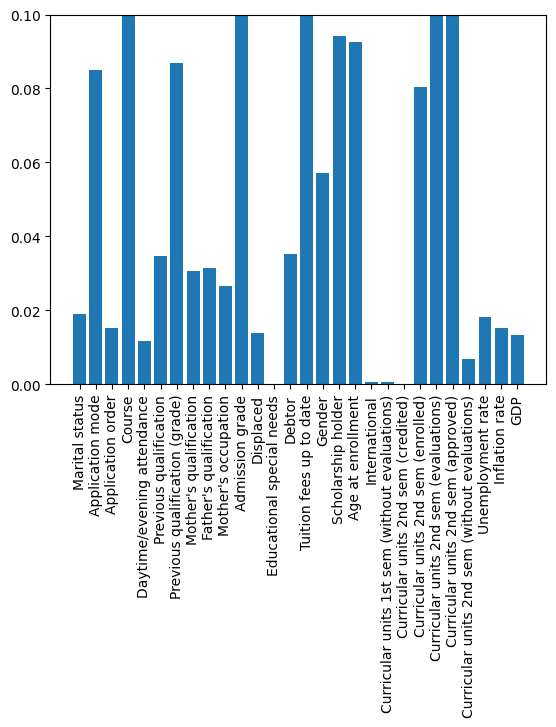

In [28]:
plt.bar(x = reduced_data.columns,height = importances)
plt.xticks(rotation='vertical')
plt.ylim([0, 0.1])
plt.show()


In [29]:
# more to drop
drop_columns = ["Educational special needs",
                "International",
                "Curricular units 2nd sem (without evaluations)",
                "Curricular units 2nd sem (credited)",
                "Curricular units 1st sem (without evaluations)"]
reduced_data = reduced_data.drop(columns=drop_columns)

In [36]:
## Fisher's Score
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(np.asarray(reduced_data), np.asarray(labels))

In [ ]:
plt.bar(x = reduced_data.columns,height = ranks)
plt.xticks(rotation='vertical')
plt.show()